In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np


In [16]:
ab = pd.read_csv("AB_NYC_2019.csv")

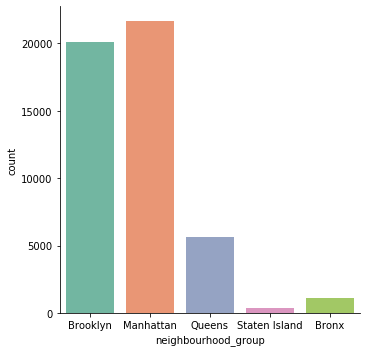

In [17]:
#Checking the most present neighbourhood group
sns.catplot(x="neighbourhood_group", kind = "count", palette = "Set2", data = ab)
plt.show()

## As we can see Manhattan is the most frequently group in this file

## ---------------------------------------------------------------------------------

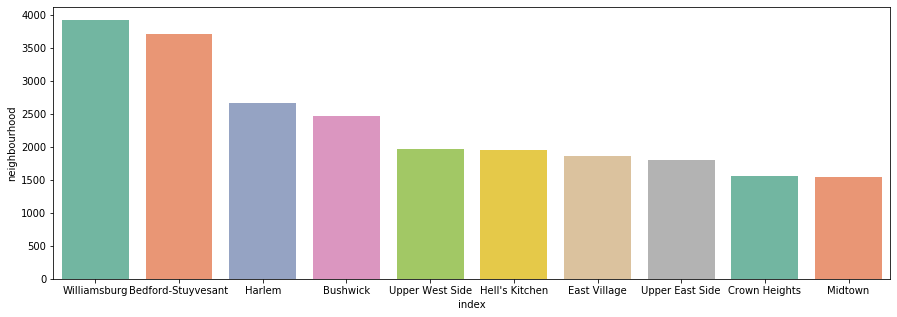

In [18]:
## Now checking the most present neighbourhood 

neighbourhood_top10 = ab["neighbourhood"].value_counts().head(10)
df_neighbourhood_top10 = pd.DataFrame(neighbourhood_top10)
df_neighbourhood_top10 = df_neighbourhood_top10.reset_index()
f, ax = plt.subplots(figsize = (15,5))
sns.barplot(x ="index", y = "neighbourhood", palette = "Set2", data = df_neighbourhood_top10)
plt.show()

## So the most frequent neighbourhood is Williamsburg followed by Bedford-Stuyvesant

## ----------------------------------------------------------------------------------

## Let's see the price for each neighbourhood_group

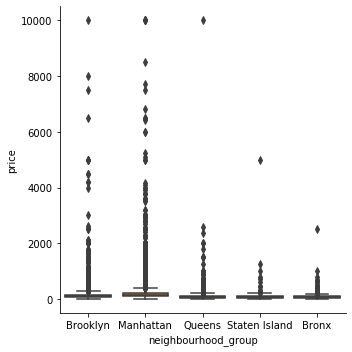

In [19]:
sns.catplot(x="neighbourhood_group", y="price", kind = "box",data = ab)
plt.show()

## That's not a very good visualization, the outliers are getting in the way. Let's remove them


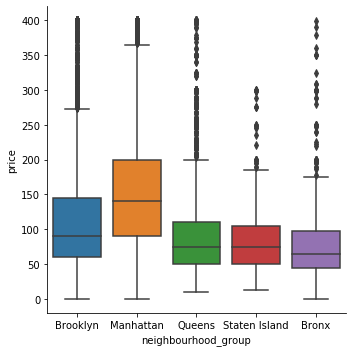

In [20]:
ab_no_outliers = ab[["neighbourhood_group","price"]]

#Here we're going to show only the prices below 400. We have 48895 rows with the full dataset, by doing this filter we will
#have 45338 rows, which means a lost of 7% of the rows due the filter.

ab_no_outliers_filteres = ab_no_outliers[ab_no_outliers["price"] <= 400]

sns.catplot(x="neighbourhood_group", y="price", kind = "box", data = ab_no_outliers_filteres)
plt.show()

# All right, we still have some outliers, but now we can have a better visualization. Let's keep this way.

# As we can see now, Queens, Manhattan, and Staten Island have a better price distribution as the median is almost on the half of the box. On the other hand, Brooklyn and Bronx have a not so good distribution because the median is near the 25th percentile than the 75th percentile

## ------------------------------------------------------------------------------------------



## Checking the most expensive room_type by it's median

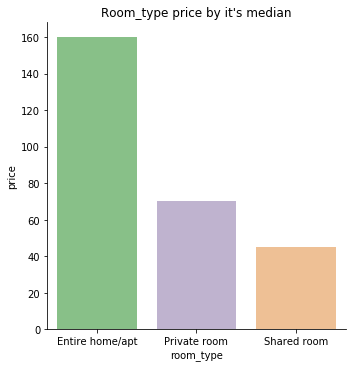

In [21]:
ab_price = ab.groupby(["room_type"])["price"].median()
df_ab_price = pd.DataFrame(ab_price)
df_ab_price = df_ab_price.reset_index()

sns.catplot(x="room_type", y="price", kind = "bar", palette = "Accent",  data = df_ab_price)
plt.title("Room_type price by it's median")
plt.show()

## Nothing new here, as we can see the Entire Home is the most expensive room_type, followed by Private Room, and Shared room. 
## I used median to avoid the effect of the outliers.

## ----------------------------------------------------------------------------------------

## Let's see how the price varies among the neighbourhood_groups

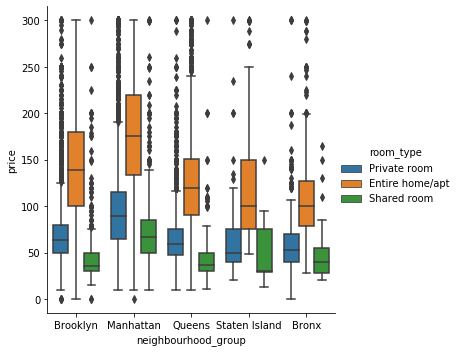

In [22]:
ab_room = ab[["neighbourhood_group","room_type","price"]]

ab_room_no_outliers = ab_room[ab_room["price"]<=300]

ax = sns.catplot(x = "neighbourhood_group", y = "price", kind = "box", hue = "room_type", data = ab_room_no_outliers)


plt.show()

## Manhattan has the highest median for all room_types. A curious point here is that the median in "Shared room" at "Staten Island is almost the same as it's 25 percentile, which shows us that the shared room price it's not homogeneous. Another thing to point out is that although the "Entire Home/apt" has a clear difference between "Queens" and "Brooklyn" this difference it's not the same when we look to "Private Room" and "Shared room". 

## ----------------------------------------------------------------------------

## Checking the number of reviews for each neighbourhood_group


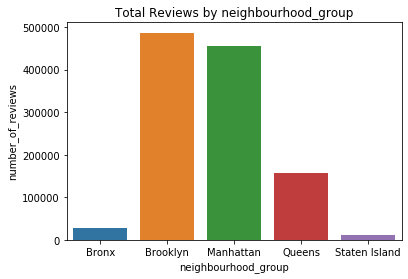

In [23]:
ab_reviews = ab.groupby(["neighbourhood_group"])["number_of_reviews"].sum()
df_ab_reviews = pd.DataFrame(ab_reviews)
df_ab_reviews = df_ab_reviews.reset_index()

sns.barplot(x="neighbourhood_group", y="number_of_reviews", data = df_ab_reviews)
plt.title("Total Reviews by neighbourhood_group")
plt.show()

## ---------------------------------------------------------------------------------------

## Plotting the latitude and longitude on a relplot to help us visualize the neighbourhood_group distribuition

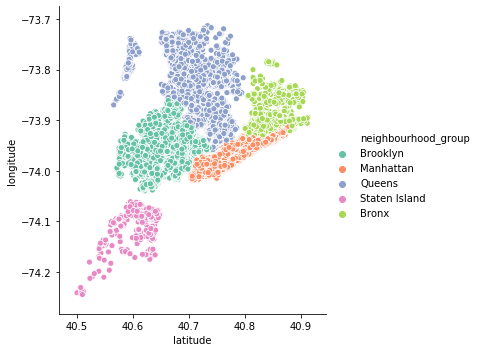

In [24]:
sns.relplot(x="latitude", y="longitude", palette = "Set2", hue = "neighbourhood_group", data = ab)
plt.show()

## Plotting latitude and longitude for price less than 100

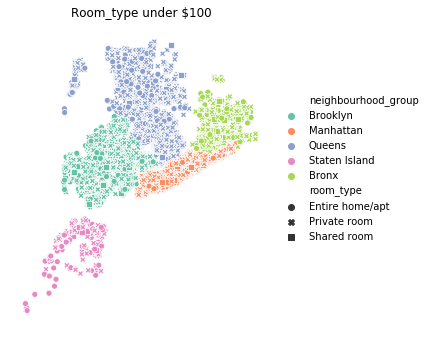

In [25]:
ab_price = ab[["longitude", "latitude", "price", "neighbourhood_group","room_type"]]
ab_price_under_100 = ab_price[ab_price["price"]<=100]

sns.relplot(x="latitude", 
            y="longitude", 
            palette = "Set2", 
            hue = "neighbourhood_group", 
            style = "room_type", 
            data = ab_price_under_100)
plt.title("Room_type under $100")
plt.axis("off")
plt.show()

## What we see here is that there's a predominance of Private Room in all the neighborhood group under $100.

## -----------------------------------------------------------------------------------

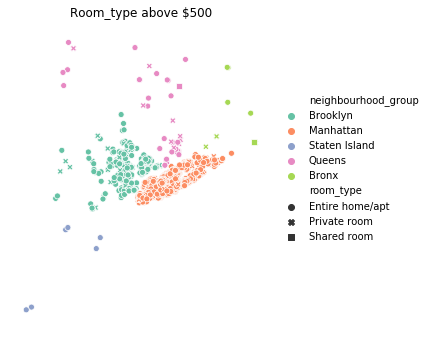

In [26]:
ab_price = ab[["longitude", "latitude", "price", "neighbourhood_group","room_type"]]
ab_price_above_500 = ab_price[ab_price["price"]>=500]

sns.relplot(x="latitude", 
            y="longitude", 
            palette = "Set2", 
            hue = "neighbourhood_group", 
            style = "room_type", 
            data = ab_price_above_500)
plt.title("Room_type above $500")
plt.axis("off")
plt.show()

## So here we can see that there's a predominance of Entire home/apt for prices above 500 dollars. Which makes sense because if someone has this amount of money to pay they'll prefer an Entire home/apt. 

## Another thing to point out is that some "neighbourhood_groups" doesn't even have a private room or shared room above 500 dollars which is the case of "Staten Island" the southest "neighbourhood_groups" 

## --------------------------------------------------------------------------------------

## Checking the minimum_night mean for each neighbourhood_group

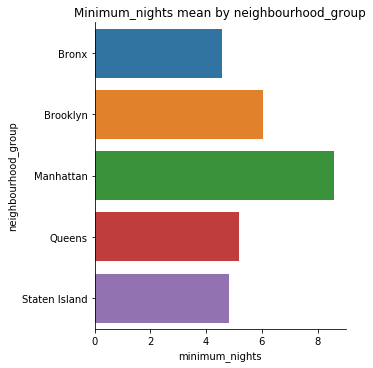

In [27]:
ab_night = ab.groupby(["neighbourhood_group"])["minimum_nights"].mean().round(2)
df_ab_night = pd.DataFrame(ab_night)
df_ab_night = df_ab_night.reset_index()

sns.catplot(x="minimum_nights", y = "neighbourhood_group", kind = "bar", data = df_ab_night)
plt.title("Minimum_nights mean by neighbourhood_group")
plt.show()

## Manhattan has the highest mean of the neighbourhood_groups

## ------------------------------------------------------------------------------------

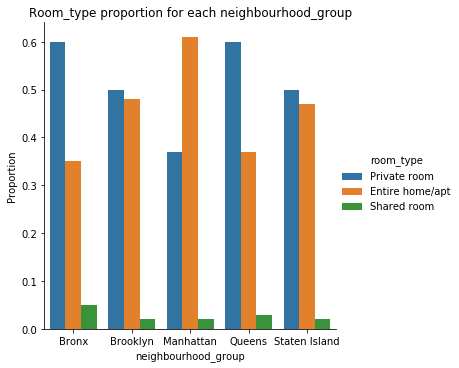

In [81]:
ab_proportion = ab.groupby(["neighbourhood_group"])["room_type"].value_counts()
df_ab_proportion = pd.DataFrame(ab_proportion)
df_ab_proportion.rename(columns={"room_type":"Total of values"}, inplace = True)


ab_count = ab.groupby(["neighbourhood_group"])["room_type"].count()
df_ab_count = pd.DataFrame(ab_count)


df_ab_proportion["Total"] = 0

df_ab_proportion.loc["Bronx"]["Total"]= df_ab_count.room_type.loc["Bronx"]
df_ab_proportion.loc["Brooklyn"]["Total"]= df_ab_count.room_type.loc["Brooklyn"]
df_ab_proportion.loc["Manhattan"]["Total"]= df_ab_count.room_type.loc["Manhattan"]
df_ab_proportion.loc["Queens"]["Total"]= df_ab_count.room_type.loc["Queens"]
df_ab_proportion.loc["Staten Island"]["Total"]= df_ab_count.room_type.loc["Staten Island"]

df_ab_proportion = df_ab_proportion.reset_index()

df_ab_proportion["Proportion"] = (df_ab_proportion["Total of values"]/df_ab_proportion["Total"]).round(2)

sns.catplot(x="neighbourhood_group",
            y = "Proportion",
            kind = "bar",
            hue = "room_type",
            data = df_ab_proportion)
plt.title("Room_type proportion for each neighbourhood_group")
plt.show()